In [1]:
# import the relevant libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

## Properties

In [2]:
properties_raw=pd.read_csv("properties.csv",index_col=0)
properties_raw

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


## Customers

In [3]:
customers_raw=pd.read_csv("customers.csv",index_col=0)
customers_raw

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [4]:
properties_raw.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

# Data Cleaning and Preprocessing

## Properties

In [5]:
#create a safeguarded copy of original data
properties=properties_raw.copy()

In [6]:
#check columns names
properties.columns.array

<PandasArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [7]:
#rename '\ufeffid' column 'id'
properties=properties.rename(columns={"\ufeffid":"id"})
#check change is done
properties.columns.array

<PandasArray>
[        'id',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [8]:
#Check data types
properties.dtypes

id              int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [9]:
#id column must be casted to string to avoid any numerical operation performed on it
properties.id=properties["id"].astype(str)
#check
properties.dtypes

id             object
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [10]:
#number of unique values
properties.id.nunique()

240

In [11]:
#check if there is null
properties.id.isnull().sum()

0

In [12]:
#show unique values if there is missing data but is not Null or NA
properties.id.unique()

array(['1030', '1029', '2002', '2031', '1049', '3011', '3026', '3023',
       '1031', '4023', '1036', '1046', '4035', '2036', '2056', '1047',
       '5051', '2007', '3020', '3029', '3015', '2004', '2006', '5013',
       '1026', '2054', '3033', '1025', '3027', '3031', '2043', '3034',
       '3016', '1018', '2050', '2044', '3039', '3053', '2041', '5035',
       '4005', '1032', '3046', '1041', '1012', '5033', '4006', '5040',
       '4013', '1003', '2009', '4024', '4012', '1035', '2017', '4051',
       '3014', '2051', '2025', '3047', '2046', '5016', '4041', '4018',
       '2005', '2010', '2022', '2047', '2012', '3038', '4030', '3017',
       '1045', '2040', '2042', '2048', '3049', '1017', '1039', '2049',
       '3054', '3055', '3042', '1038', '2020', '2014', '3001', '3043',
       '2016', '4049', '4022', '3059', '4034', '5027', '5028', '2026',
       '3022', '2024', '3003', '2011', '2028', '3028', '3036', '4010',
       '4011', '3035', '3037', '2032', '2018', '2035', '5025', '2029',
      

In [13]:
#number of unique values
properties.building.nunique()

5

In [14]:
#check if there is null
properties.building.isnull().sum()

0

In [15]:
#show unique values if there is missing data but is not Null or NA
properties.building.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [16]:
#No missing data in building column
#building column data type needs casted to string because it is categorical
properties['building']=properties['building'].astype(str)
#check
properties.dtypes

id             object
building       object
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [17]:
#show unique values if there is missing data but is not Null or NA
properties.date_sale.unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [18]:
#change '#NUM!' values in date_sale to pd.NA
properties['date_sale']=np.where(properties['date_sale']=='#NUM!',
                                 pd.NA,
                                 properties['date_sale'])

In [19]:
#change date_sale to datetime
properties['date_sale']=pd.to_datetime(properties['date_sale'])
#Check
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#              int64
area                 float64
price                 object
status                object
customerid            object
dtype: object

In [20]:
#Some statistics
properties.describe(include='all',datetime_is_numeric=True)

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267.000000,267.000000,267,267,195
unique,240,5,NaN,2,NaN,NaN,266,2,162
top,5041,3,NaN,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,NaN,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,27.580524,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,40.000000,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,59.000000,1942.500000,NaN,NaN,NaN


In [21]:
#show unique values to if there is missing data but is not Null or NA
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [22]:
#show unique values to if there is missing data but is not Null or NA
properties["property#"].unique()

array([30, 29,  2, 31, 49, 11, 26, 23, 36, 46, 35, 56, 47, 51,  7, 20, 15,
        4,  6, 13, 54, 33, 25, 27, 43, 34, 16, 18, 50, 44, 39, 53, 41,  5,
       32, 12, 40,  3,  9, 24, 17, 14, 10, 22, 38, 45, 42, 48, 55,  1, 59,
       28, 37, 57, 19, 21,  8, 52, 58], dtype=int64)

In [23]:
#column data type needs casted to string because it is categorical
properties["property#"]=properties["property#"].astype(str)
#check
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

In [24]:
#show unique values if there is missing data but is not Null or NA
properties['area'].unique()

array([ 743.09,  756.21,  587.28, 1604.75, 1375.45,  675.19,  670.89,
        720.81,  782.25,  794.52, 1160.36, 1942.5 , 1109.25, 1400.95,
       1479.72,  790.54,  723.93,  781.07, 1127.76,  720.7 ,  649.69,
       1307.45,  618.38,  625.8 , 1203.29, 1434.09, 1596.35, 1110.32,
        697.89,  957.53,  722.96,  923.21,  670.24,  785.48,  798.28,
       1121.95,  733.19,  717.05,  747.5 ,  827.87, 1608.84, 1132.06,
       1383.84,  927.83,  669.16,  928.16,  798.5 , 1305.62,  927.08,
        649.8 ,  743.41, 1283.45, 1288.62, 1222.34,  579.75, 1128.4 ,
        701.66, 1336.93, 1171.55, 1137.44,  618.16, 1057.92, 1396.86,
        736.63,  723.83, 1238.58,  977.87, 1093.  ,  680.57, 1615.29,
        720.38, 1769.48,  410.71, 1200.82,  800.96,  775.69,  713.71,
        763.21, 1603.99,  784.19, 1273.88,  966.57, 1357.16, 1343.39,
        758.69,  789.25, 1611.85, 1111.72, 1058.25,  791.72, 1068.58,
       1325.31, 1273.55,  606.33,  598.58, 1013.27, 1074.71])

In [25]:
#create new column 'price$' to edit it seperately
properties["price$"]=properties["price"]
#remove $ from column price$
properties["price$"]=properties["price$"].str.strip('$')
#remove , from column price$
properties["price$"]=properties["price$"].replace(',','',regex=True)
#cast to float
properties["price$"]=properties["price$"].astype(float)
#check
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
price$               float64
dtype: object

In [26]:
#drop old price column
properties=properties.drop(["price"],axis=1)

In [27]:
#show unique values if there is missing data but is not Null or NA
properties["status"].unique()

array([' Sold ', '-'], dtype=object)

In [28]:
#create new column to edit it seperately
properties['sold']=properties['status']
#mapping
properties['sold']=properties['status'].map({' Sold ':1,'-':0})
#check 
properties['sold'].unique()

array([1, 0], dtype=int64)

In [29]:
#drop old column
properties=properties.drop(['status'],axis=1)

In [30]:
#show unique values if there is missing data but is not Null or NA
properties["customerid"].unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [31]:
#number of missing customer ids
properties["customerid"].isna().sum()

72

In [32]:
#number of missing data
properties.isna().sum()

id             0
building       0
date_sale     72
type           0
property#      0
area           0
customerid    72
price$         0
sold           0
dtype: int64

## Customers

In [33]:
#create a safeguarded copy of original data
customers=customers_raw.copy()
customers

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [34]:
customers.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [35]:
#check columns names
customers.columns.array

<PandasArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [36]:
# rename customerid in an appropriate way
customers = customers.rename(columns= {'\ufeffcustomerid':'customerid'})
#check columns names
customers.columns.array

<PandasArray>
[       'customerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [37]:
#show unique values if there is missing data but is not Null or NA
customers["entity"].unique()

array(['Individual', 'Company'], dtype=object)

In [38]:
#add new column 'full_name' instead of name and surname
customers["full_name"]=customers["name"]+" "+customers["surname"]
#check
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website,Russell Gross
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website,Marleez Co
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency,Emmy Singh
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website,Colin Campos
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website,Anya Stephenson
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website,Parker Poole


In [39]:
customers=customers.drop(['name','surname'],axis=1)
#check
customers

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,Individual,5/11/1968,F,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,Individual,11/26/1962,M,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,Individual,4/7/1959,M,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,Individual,11/25/1959,M,USA,California,Home,5,No,Website,Russell Gross
4,C0174,Company,NaN,NaN,USA,California,Investment,5,No,Website,Marleez Co
...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency,Emmy Singh
158,C0138,Individual,4/14/1942,M,USA,California,Home,3,No,Website,Colin Campos
159,C0113,Individual,6/11/1959,F,USA,California,Home,4,No,Website,Anya Stephenson
160,C0147,Individual,11/10/1951,M,USA,California,Home,5,No,Website,Parker Poole


In [40]:
#show unique values if there is missing data but is not Null or NA
customers["birth_date"].unique()

array(['5/11/1968', '11/26/1962', '4/7/1959', '11/25/1959', nan,
       '3/6/1957', '5/24/1947', '10/17/1969', '10/5/1975', '6/17/1966',
       '6/17/1956', '8/10/1962', '8/19/1941', '9/3/1939', '1/8/1977',
       '2/7/1967', '9/9/1957', '10/17/1967', '6/9/1938', '9/14/1966',
       '12/6/1958', '11/5/1963', '1/20/1937', '9/23/1962', '9/8/1968',
       '4/15/1958', '2/26/1976', '6/19/1952', '12/25/1977', '8/11/1966',
       '8/14/1968', '10/30/1969', '5/12/1965', '9/1/1973', '1/20/1962',
       '12/25/1974', '6/13/1967', '3/22/1975', '4/13/1967', '8/12/1975',
       '4/4/1965', '2/13/1931', '10/12/1968', '9/24/1964', '7/31/1970',
       '3/20/1957', '8/20/1971', '3/5/1940', '3/3/1941', '2/3/1967',
       '1/7/1954', '6/7/1973', '12/7/1964', '6/8/1933', '6/16/1960',
       '5/7/1972', '5/12/1967', '3/27/1974', '7/23/1942', '2/10/1974',
       '3/26/1972', '6/10/1977', '2/26/1966', '4/1/1970', '4/27/1947',
       '12/27/1985', '2/3/1953', '1/11/1965', '1/1/1959', '5/5/1970',
       '3/13

In [41]:
#number of null
customers["birth_date"].isna().sum()

7

In [42]:
#convert to datetime
customers["birth_date"]=pd.to_datetime(customers["birth_date"])

In [43]:
#check
customers.dtypes

customerid                   object
entity                       object
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                     object
source                       object
full_name                    object
dtype: object

In [44]:
#show unique values if there is missing data but is not Null or NA
customers["mortgage"].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
#Mapping "mortgage" column 'Yes' to 1 and 'No' to 0
customers["mortgage"]=customers["mortgage"].map({'Yes':1,'No':0})
customers["mortgage"].unique()

array([1, 0], dtype=int64)

In [46]:
customers['country'].unique()
#there is entry 'USA ' with space

array(['USA', 'USA ', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia',
       'UK', 'Denmark'], dtype=object)

In [47]:
#remove extra space
customers['country']=customers['country'].str.strip()
#check
customers['country'].unique()

array(['USA', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia', 'UK',
       'Denmark'], dtype=object)

In [48]:
customers['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [49]:
customers['state'].unique()

array(['California', nan, 'Oregon', 'Arizona', 'Nevada', 'Colorado',
       'Utah', 'Virginia', 'Wyoming', 'Kansas'], dtype=object)

In [50]:
customers['source'].unique()

array(['Website', 'Agency', 'Client'], dtype=object)

In [51]:
customers.isna().sum()

customerid           0
entity               0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [52]:
customers.head()

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,Individual,1968-05-11,F,USA,California,Home,4,1,Website,Kareem Liu
1,C0010,Individual,1962-11-26,M,USA,California,Home,1,0,Website,Trystan Oconnor
2,C0132,Individual,1959-04-07,M,USA,California,Home,4,1,Agency,Kale Gay
3,C0137,Individual,1959-11-25,M,USA,California,Home,5,0,Website,Russell Gross
4,C0174,Company,NaT,NaN,USA,California,Investment,5,0,Website,Marleez Co


# Merge two tables

In [53]:
# We will use the 'merge' function in pandas to combine the two dataframes.
# The 'customerid' column is designated as the common key on which the dataframes will be merged. 
# We opt for a left join, retaining all rows from the 'properties' dataframe and appending matching rows from the 'customers' dataframe. 
# If there's no match, the resultant dataframe will have 'NA' for the corresponding 'customers' dataframe columns.
# It's assumed that a customer entry will only be present in the 'customers' dataframe if they have made a property purchase.
pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,Apartment,30,743.09,C0028,246172.68,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,Apartment,29,756.21,C0027,246331.90,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,Apartment,2,587.28,C0112,209280.91,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,Apartment,31,1604.75,C0160,452667.01,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,Apartment,49,1375.45,C0014,467083.31,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,Apartment,44,1238.58,NaN,322610.74,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,Apartment,47,794.52,NaN,279191.26,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,Apartment,48,1013.27,NaN,287996.53,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,Apartment,50,1074.71,NaN,365868.78,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# The merge did not work as intended.
# There probably is a problem with the key
#so we will check that 'customerid' columns in both tables have the same the same data
properties['customerid'].unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [55]:
#remove also spaces that needs to be trimmed from 'customerid' column in 'customers' table
properties['customerid']=properties['customerid'].str.strip()
#check
properties['customerid'].unique()

array(['C0028', 'C0027', 'C0112', 'C0160', 'C0014', 'C0125', 'C0166',
       'C0034', 'C0170', 'C0009', 'C0041', 'C0057', 'C0061', 'C0089',
       'C0159', 'C0171', 'C0042', 'C0093', 'C0051', 'C0064', 'C0128',
       'C0019', 'C0037', 'C0127', 'C0018', 'C0040', 'C0080', 'C0083',
       'C0085', 'C0091', 'C0007', 'C0048', 'C0065', 'C0096', 'C0164',
       'C0038', 'C0087', 'C0142', 'C0015', 'C0122', 'C0017', 'C0020',
       'C0086', 'C0150', 'C0156', 'C0169', 'C0022', 'C0072', 'C0136',
       'C0149', 'C0011', 'C0073', 'C0110', 'C0111', 'C0123', 'C0070',
       'C0075', 'C0076', 'C0105', 'C0135', 'C0153', 'C0047', 'C0060',
       'C0066', 'C0068', 'C0090', 'C0095', 'C0151', 'C0162', 'C0010',
       'C0054', 'C0056', 'C0081', 'C0084', 'C0016', 'C0035', 'C0062',
       'C0099', 'C0114', 'C0006', 'C0053', 'C0069', 'C0077', 'C0168',
       'C0058', 'C0107', 'C0131', 'C0144', 'C0098', 'C0130', 'C0141',
       'C0067', 'C0082', 'C0113', 'C0132', 'C0137', 'C0155', 'C0163',
       'C0039', 'C00

In [56]:
#there are some spaces that needs to be trimmed
customers['customerid']=customers['customerid'].str.strip()
#check
customers['customerid'].unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [57]:
properties['customerid'].isna().sum()

72

In [58]:
properties['customerid'] = np.where(properties['customerid']=='', pd.NA, properties['customerid'])

In [59]:
properties['customerid'].isna().sum()

72

In [60]:
#Check merging two tables now
pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,Apartment,30,743.09,C0028,246172.68,1,Individual,1986-06-21,F,USA,California,Home,5.0,0.0,Website,Madalyn Mercer
1,1029,1,2005-10-01,Apartment,29,756.21,C0027,246331.90,1,Individual,1983-02-24,F,USA,California,Home,5.0,0.0,Website,Lara Carrillo
2,2002,2,2007-07-01,Apartment,2,587.28,C0112,209280.91,1,Individual,1985-12-27,M,USA,California,Home,1.0,1.0,Client,Donavan Flowers
3,2031,2,2007-12-01,Apartment,31,1604.75,C0160,452667.01,1,Individual,1985-12-27,M,USA,California,Investment,3.0,1.0,Website,Darien Dorsey
4,1049,1,2004-11-01,Apartment,49,1375.45,C0014,467083.31,1,Individual,1979-05-15,F,USA,California,Home,4.0,0.0,Agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,Apartment,44,1238.58,NaN,322610.74,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,Apartment,47,794.52,NaN,279191.26,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,Apartment,48,1013.27,NaN,287996.53,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,Apartment,50,1074.71,NaN,365868.78,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#add two merged tables to a dataframe called real_estate_data
real_estate_data = pd.merge(properties, customers, on='customerid', how='left')
real_estate_data.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
customerid                   object
price$                      float64
sold                          int64
entity                       object
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

In [62]:
#define Categorical columns
categorical=['id','building','type','property#','customerid','entity','sex','country','state','purpose','source','full_name']


In [63]:
real_estate_data[categorical]

,id,building,type,property#,customerid,entity,sex,country,state,purpose,source,full_name
0,1030,1,Apartment,30,C0028,Individual,F,USA,California,Home,Website,Madalyn Mercer
1,1029,1,Apartment,29,C0027,Individual,F,USA,California,Home,Website,Lara Carrillo
2,2002,2,Apartment,2,C0112,Individual,M,USA,California,Home,Client,Donavan Flowers
3,2031,2,Apartment,31,C0160,Individual,M,USA,California,Investment,Website,Darien Dorsey
4,1049,1,Apartment,49,C0014,Individual,F,USA,California,Home,Agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,Apartment,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,Apartment,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,Apartment,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,Apartment,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Change all string columns to lower case letters
real_estate_data['building']=real_estate_data['building'].str.lower()
real_estate_data['type']=real_estate_data['type'].str.lower()
real_estate_data['entity']=real_estate_data['entity'].str.lower()
real_estate_data['sex']=real_estate_data['sex'].str.lower()
real_estate_data['country']=real_estate_data['country'].str.lower()
real_estate_data['state']=real_estate_data['state'].str.lower()
real_estate_data['purpose']=real_estate_data['purpose'].str.lower()
real_estate_data['source']=real_estate_data['source'].str.lower()
real_estate_data['full_name']=real_estate_data['full_name'].str.lower()
#Check
real_estate_data[categorical]

,id,building,type,property#,customerid,entity,sex,country,state,purpose,source,full_name
0,1030,1,apartment,30,C0028,individual,f,usa,california,home,website,madalyn mercer
1,1029,1,apartment,29,C0027,individual,f,usa,california,home,website,lara carrillo
2,2002,2,apartment,2,C0112,individual,m,usa,california,home,client,donavan flowers
3,2031,2,apartment,31,C0160,individual,m,usa,california,investment,website,darien dorsey
4,1049,1,apartment,49,C0014,individual,f,usa,california,home,agency,alessandra perry
...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,apartment,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,apartment,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,apartment,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,apartment,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

In [65]:
# We'll assign the cleaned and preprocessed data to a new variable 'data'.
data = real_estate_data.copy()
data

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,1986-06-21,f,usa,california,home,5.0,0.0,website,madalyn mercer
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,1983-02-24,f,usa,california,home,5.0,0.0,website,lara carrillo
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,1985-12-27,m,usa,california,home,1.0,1.0,client,donavan flowers
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,1985-12-27,m,usa,california,investment,3.0,1.0,website,darien dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,1979-05-15,f,usa,california,home,4.0,0.0,agency,alessandra perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,NaN,322610.74,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,NaN,279191.26,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,NaN,287996.53,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,NaN,365868.78,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data.describe(datetime_is_numeric=True)

,date_sale,area,price$,sold,birth_date,deal_satisfaction,mortgage
count,195,267.000000,267.000000,267.000000,178,195.000000,195.000000
mean,2006-11-08 14:38:46.153846272,936.221311,281171.901386,0.730337,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,2004-03-01 00:00:00,410.710000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,2006-04-16 00:00:00,756.210000,217553.055000,0.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,2007-03-01 00:00:00,798.280000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,2007-09-01 00:00:00,1121.950000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,2010-05-01 00:00:00,1942.500000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,NaN,284.894858,89119.121005,0.444618,NaN,1.340872,0.466878


## Grouping by building number

In [67]:
# Let's identify the unique buildings in our dataset.
data['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [68]:
data.groupby("building").sum()

,area,price$,sold,deal_satisfaction,mortgage
building,,,,,
1,48258.02,14307448.61,46,167.0,14.0
2,53801.84,16339725.35,54,190.0,18.0
3,58454.70,17668429.10,53,189.0,15.0
4,41913.00,12480299.17,23,89.0,9.0
5,47543.53,14276995.44,19,67.0,6.0


In [69]:
data.groupby("building").mean()

,area,price$,sold,deal_satisfaction,mortgage
building,,,,,
1,928.038846,275143.242500,0.884615,3.630435,0.304348
2,943.891930,286661.848246,0.947368,3.518519,0.333333
3,927.852381,280451.255556,0.841270,3.566038,0.283019
4,974.720930,290239.515581,0.534884,3.869565,0.391304
5,914.298654,274557.604615,0.365385,3.526316,0.315789


In [70]:
# For more structured approach to this problem, let's create a variable to hold the columns of interest.
# This variable will include the column we want to group by and the columns we wish to aggregate.
# It would be informative to observe the total number of properties sold 
# and those under mortgage per building - these would represent total counts.
columns_of_interest=['building','sold','mortgage']
#now let's define new dataframe totals_by_building
totals_by_building = data[columns_of_interest].groupby('building').sum()
totals_by_building

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


In [71]:
# Alternatively, we could examine the average area, price, and deal satisfaction by building.
columns_of_interest=['building','area','price$','deal_satisfaction']
#now let's define new dataframe averages_by_building
averages_by_building=data[columns_of_interest].groupby('building').mean()
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


## Grouping by Country

In [72]:
data.groupby('country').sum()

,area,price$,sold,deal_satisfaction,mortgage
country,,,,,
belgium,1705.46,458150.94,2,6.0,0.0
canada,6421.68,1918485.69,7,35.0,0.0
denmark,785.48,257183.48,1,1.0,0.0
germany,743.41,205098.21,1,5.0,0.0
mexico,1283.45,338181.18,1,3.0,0.0
russia,3615.03,1115315.34,4,10.0,1.0
uk,1478.96,440285.36,2,8.0,0.0
usa,159440.62,47807039.18,177,634.0,61.0


In [73]:
#like we've done while grouping by building,we will calculate totals with properties sold 
#and those under mortgage in each country
columns_of_interest=['country','sold','mortgage']
#now let's define new dataframe totals_by_country
totals_by_country = data[columns_of_interest].groupby('country').sum()
totals_by_country

,sold,mortgage
country,,
belgium,2,0.0
canada,7,0.0
denmark,1,0.0
germany,1,0.0
mexico,1,0.0
russia,4,1.0
uk,2,0.0
usa,177,61.0


In [74]:
# Alternatively, we could examine the average area, price, and deal satisfaction by each country.
columns_of_interest=['country','area','price$','deal_satisfaction']
#now let's define new dataframe averages_by_country
averages_by_country=data[columns_of_interest].groupby('country').mean()
averages_by_country

,area,price$,deal_satisfaction
country,,,
belgium,852.730000,229075.470000,3.000000
canada,917.382857,274069.384286,5.000000
denmark,785.480000,257183.480000,1.000000
germany,743.410000,205098.210000,5.000000
mexico,1283.450000,338181.180000,3.000000
russia,903.757500,278828.835000,2.500000
uk,739.480000,220142.680000,4.000000
usa,900.794463,270096.266554,3.581921


## Grouping by state

In [75]:
#like we've done while grouping by state,we will calculate totals with properties sold 
#and those under mortgage in each state
columns_of_interest=['state','sold','mortgage']
#now let's define new dataframe totals_by_state
totals_by_state = data[columns_of_interest].groupby('state').sum()
totals_by_state

,sold,mortgage
state,,
arizona,11,3.0
california,120,41.0
colorado,11,5.0
kansas,1,0.0
nevada,17,8.0
oregon,11,1.0
utah,5,1.0
virginia,4,2.0
wyoming,1,0.0


In [76]:
totals_by_state.sum()

sold        181.0
mortgage     61.0
dtype: float64

In [77]:
totals_by_country
#we observe that totals sold in USA is less than sum of totals sold in states
#so we need to clean state column

,sold,mortgage
country,,
belgium,2,0.0
canada,7,0.0
denmark,1,0.0
germany,1,0.0
mexico,1,0.0
russia,4,1.0
uk,2,0.0
usa,177,61.0


In [78]:
data['state'].unique()
#no fake data , so there might be empty or nan entry in state column

array(['california', 'virginia', 'arizona', 'oregon', 'nevada',
       'colorado', 'utah', nan, 'kansas', 'wyoming'], dtype=object)

In [79]:
#clean state column
data['state'] = np.where(data['state']==' ' , pd.NA ,data['state'])
data['state'] = np.where(data['country'] != 'usa' , pd.NA ,data['state'])

In [80]:
columns_of_interest=['state','sold','mortgage']
#now let's define new dataframe totals_by_state
totals_by_state = data[columns_of_interest].groupby('state').sum()
totals_by_state

,sold,mortgage
state,,
arizona,9,3.0
california,118,41.0
colorado,11,5.0
kansas,1,0.0
nevada,17,8.0
oregon,11,1.0
utah,5,1.0
virginia,4,2.0
wyoming,1,0.0


In [81]:
totals_by_state.sum()

sold        177.0
mortgage     61.0
dtype: float64

## Relative and Cumulative frequency of sold properties by state

In [82]:
columns_of_interest = ['state','sold']
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
arizona,9
california,118
colorado,11
kansas,1
nevada,17
oregon,11
utah,5
virginia,4
wyoming,1


In [83]:
#sort data in descending order
sold_by_state = sold_by_state.sort_values('sold',ascending = False)
sold_by_state

,sold
state,
california,118
nevada,17
colorado,11
oregon,11
arizona,9
utah,5
virginia,4
kansas,1
wyoming,1


In [84]:
#Rename 'sold' column 'frequency'
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
california,118
nevada,17
colorado,11
oregon,11
arizona,9
utah,5
virginia,4
kansas,1
wyoming,1


In [85]:
#add 'relative frequency' column to table
#relative frequency = frequency of each state / total frequency
sold_by_state['relative frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative frequency
state,,
california,118,0.666667
nevada,17,0.096045
colorado,11,0.062147
oregon,11,0.062147
arizona,9,0.050847
utah,5,0.028249
virginia,4,0.022599
kansas,1,0.005650
wyoming,1,0.005650


In [86]:
#add 'cumulative frequency' to table
sold_by_state['cumulative frequency'] = sold_by_state['relative frequency'].cumsum()
sold_by_state

,frequency,relative frequency,cumulative frequency
state,,,
california,118,0.666667,0.666667
nevada,17,0.096045,0.762712
colorado,11,0.062147,0.824859
oregon,11,0.062147,0.887006
arizona,9,0.050847,0.937853
utah,5,0.028249,0.966102
virginia,4,0.022599,0.988701
kansas,1,0.005650,0.994350
wyoming,1,0.005650,1.000000


# Data Analysis

## Customer age at time of purchase

In [87]:
#subtract customer birth date from date of purchase
data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']

0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [88]:
data['age_at_purchase'][0].days

7073

In [89]:
#convert 'age_at_purchase' column to int or float to change it to years
data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x:x.days)
data['age_at_purchase']

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [90]:
#change to years
data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [91]:
#round down years
data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x:np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

In [92]:
data['age_interval'] = pd.cut(data['age_at_purchase_rounded'] , bins=10 , precision=0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 30.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 30.0] < (30.0, 36.0] < (36.0, 42.0] ... (53.0, 59.0] < (59.0, 65.0] < (65.0, 70.0] < (70.0, 76.0]]

In [93]:
#frequency of selling properties 
columns_of_interest=['age_interval','sold']
sold_by_age = data[columns_of_interest].groupby('age_interval').sum()
sold_by_age

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 30.0]",16
"(30.0, 36.0]",29
"(36.0, 42.0]",30
"(42.0, 48.0]",24
"(48.0, 53.0]",22
"(53.0, 59.0]",19
"(59.0, 65.0]",12
"(65.0, 70.0]",18


## Grouping by price interval

In [94]:
data['price_interval'] = pd.cut(data['price$'] , bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

In [95]:
#Count all proerties sold or not sold by price interval
columns_of_interest = ['price_interval','sold']
all_properties_by_price = data[columns_of_interest].groupby('price_interval').count()
#Rename column 'count' instead of 'sold'
all_properties_by_price = all_properties_by_price.rename(columns= {'sold':'count'})
all_properties_by_price

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


In [96]:
#counting only sold properties by summing sold column
columns_of_interest = ['price_interval','sold']
sold_properties_by_price = data[columns_of_interest].groupby('price_interval').sum()
sold_properties_by_price

,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


In [97]:
#counting not sold properties by subtracting sold from all
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price['not_sold'] = all_properties_by_price['count']-all_properties_by_price['sold']
all_properties_by_price

,count,sold,not_sold
price_interval,,,
"(117143.362, 159634.837]",3,2,1
"(159634.837, 201705.604]",32,28,4
"(201705.604, 243776.371]",88,68,20
"(243776.371, 285847.138]",47,34,13
"(285847.138, 327917.905]",31,24,7
"(327917.905, 369988.672]",18,12,6
"(369988.672, 412059.439]",21,13,8
"(412059.439, 454130.206]",7,4,3
"(454130.206, 496200.973]",11,7,4


## Filter data to get sold properties for individuals

In [98]:
data

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,...,california,home,5.0,0.0,website,madalyn mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,...,california,home,5.0,0.0,website,lara carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,...,california,home,1.0,1.0,client,donavan flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,...,california,investment,3.0,1.0,website,darien dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,...,california,home,4.0,0.0,agency,alessandra perry,25.484932,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,NaN,322610.74,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,NaN,279191.26,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,NaN,287996.53,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,NaN,365868.78,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]"


In [99]:
#filter only sold properties
data_sold = data[data['sold']==1]
data_sold

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,...,california,home,5.0,0.0,website,madalyn mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,...,california,home,5.0,0.0,website,lara carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,...,california,home,1.0,1.0,client,donavan flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,...,california,investment,3.0,1.0,website,darien dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,...,california,home,4.0,0.0,agency,alessandra perry,25.484932,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1022,1,2005-07-01,apartment,22,743.09,C0174,210745.17,1,company,...,california,investment,5.0,0.0,website,marleez co,NaN,NaN,NaN,"(201705.604, 243776.371]"
192,1028,1,2005-07-01,apartment,28,1160.36,C0174,331154.88,1,company,...,california,investment,5.0,0.0,website,marleez co,NaN,NaN,NaN,"(327917.905, 369988.672]"
193,1034,1,2005-07-01,apartment,34,625.80,C0174,204434.68,1,company,...,california,investment,5.0,0.0,website,marleez co,NaN,NaN,NaN,"(201705.604, 243776.371]"
194,1037,1,2005-07-01,apartment,37,756.21,C0174,189194.31,1,company,...,california,investment,5.0,0.0,website,marleez co,NaN,NaN,NaN,"(159634.837, 201705.604]"


In [100]:
#filter only individual
data_sold_individual = data_sold[data_sold['entity']=='individual']
data_sold_individual

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,...,california,home,5.0,0.0,website,madalyn mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,...,california,home,5.0,0.0,website,lara carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,...,california,home,1.0,1.0,client,donavan flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,...,california,investment,3.0,1.0,website,darien dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,...,california,home,4.0,0.0,agency,alessandra perry,25.484932,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3040,3,2007-06-01,apartment,40,670.89,C0103,204292.49,1,individual,...,oregon,investment,2.0,0.0,website,jamal mueller,70.846575,70.0,"(65.0, 70.0]","(201705.604, 243776.371]"
174,1023,1,2005-04-01,apartment,23,782.25,C0021,261579.89,1,individual,...,<NA>,investment,3.0,0.0,website,kaylin villarreal,72.849315,72.0,"(70.0, 76.0]","(243776.371, 285847.138]"
175,3009,3,2006-05-01,apartment,9,743.41,C0148,222867.42,1,individual,...,california,investment,5.0,1.0,agency,myah roman,73.038356,73.0,"(70.0, 76.0]","(201705.604, 243776.371]"
176,3052,3,2006-03-01,apartment,52,923.21,C0172,291494.36,1,individual,...,california,home,4.0,1.0,agency,henry kennedy,72.778082,72.0,"(70.0, 76.0]","(285847.138, 327917.905]"


## Relationship between age and price

In [101]:
#Calculate covariance between age and price for sold properties by individuals
np.cov(data_sold_individual['age_at_purchase'],data_sold_individual['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

In [102]:
#Calculate correlation coefficient between age and price for sold properties by individuals
np.corrcoef(data_sold_individual['age_at_purchase'],data_sold_individual['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [103]:
#remove any row with missing values
data_sold_individual_no_na = data_sold_individual.dropna()

In [104]:
#Calculate correlation coefficient between age and price for sold properties by individuals 
#after removing row with missing data
np.corrcoef(data_sold_individual_no_na['age_at_purchase'],data_sold_individual_no_na['price$'])

array([[ 1.        , -0.19574621],
       [-0.19574621,  1.        ]])

In [105]:
data_sold_individual_no_na[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.195746
price$,-0.195746,1.000000


# Data Visualization

## Deal Satisfaction Average across Countries Bar Chart

In [106]:
averages_by_country

,area,price$,deal_satisfaction
country,,,
belgium,852.730000,229075.470000,3.000000
canada,917.382857,274069.384286,5.000000
denmark,785.480000,257183.480000,1.000000
germany,743.410000,205098.210000,5.000000
mexico,1283.450000,338181.180000,3.000000
russia,903.757500,278828.835000,2.500000
uk,739.480000,220142.680000,4.000000
usa,900.794463,270096.266554,3.581921


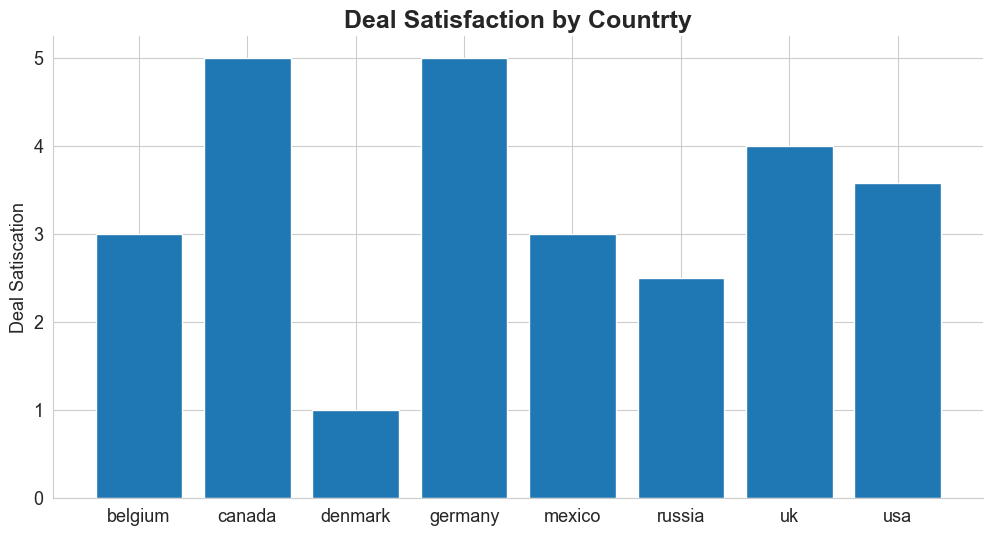

In [107]:
# override the default matplotlib style, to avoid the grey background, but keep the grid
sns.set_style("whitegrid") 
#determine the size of the chart
plt.figure(figsize = (12, 6)) 
plt.bar(x = averages_by_country.index,
       height = averages_by_country['deal_satisfaction'])
plt.xticks( fontsize = 13) # format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel('Deal Satiscation',fontsize=13)# add label for y-axis
plt.title('Deal Satisfaction by Countrty',fontsize=18,fontweight='bold')# add title for chart
sns.despine() # removes the top and right border of our graph
plt.savefig("deal_satisfaction_by_country_bar_chart.pdf") # export your chart as a pdf file
plt.savefig("deal_satisfaction_by_country_bar_chart.png") # export your chart as a picture
plt.show()

## Customer Age Distribution Histogram

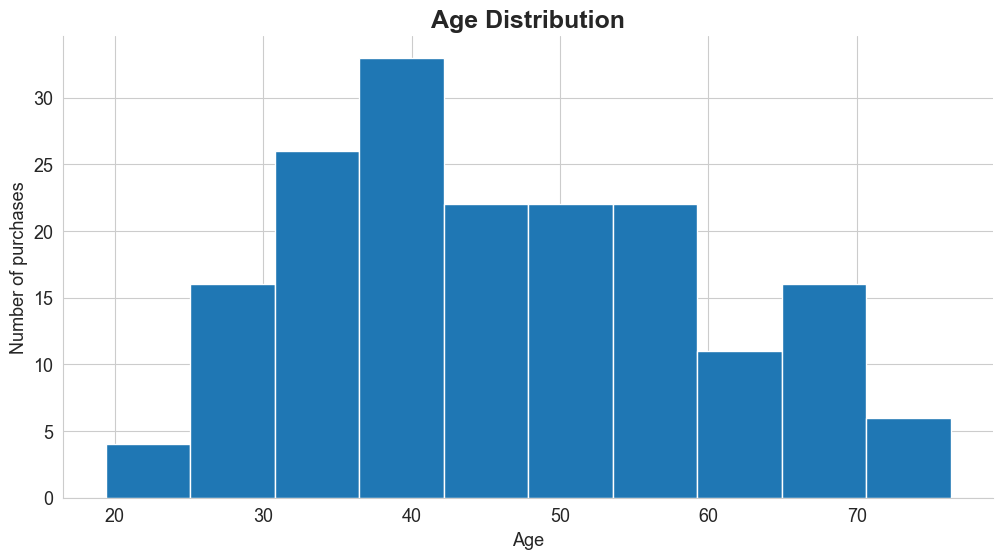

In [108]:
# override the default matplotlib style, to avoid the grey background, but keep the grid
sns.set_style("whitegrid") 
#determine the size of the chart
plt.figure(figsize = (12, 6)) 
plt.hist(x = data['age_at_purchase'],
         bins = 10)
# format the x-axis
plt.xticks( fontsize = 13) 
# format the y-axis
plt.yticks(fontsize = 13) 
# add label for x-axis
plt.xlabel('Age',fontsize=13)
# add label for y-axis
plt.ylabel('Number of purchases',fontsize=13)
# add title for chart
plt.title('Age Distribution',fontsize=18,fontweight='bold')
# removes the top and right border of our graph
sns.despine() 
# export your chart as a pdf file
plt.savefig("Age_Distribution_Histogram.pdf") 
# export your chart as a picture
plt.savefig("Age_Distribution_Histogram.png") 
plt.show()

## Segementation by state (Pareto Chart)

In [109]:
sold_by_state

,frequency,relative frequency,cumulative frequency
state,,,
california,118,0.666667,0.666667
nevada,17,0.096045,0.762712
colorado,11,0.062147,0.824859
oregon,11,0.062147,0.887006
arizona,9,0.050847,0.937853
utah,5,0.028249,0.966102
virginia,4,0.022599,0.988701
kansas,1,0.005650,0.994350
wyoming,1,0.005650,1.000000


This is a Pareto diagram. The bars show the absolute frequency of each category. In this case this translates to: how many customers are there from each state.

The secondary axis shows the cumulative frequency.

In [110]:
# we need to import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

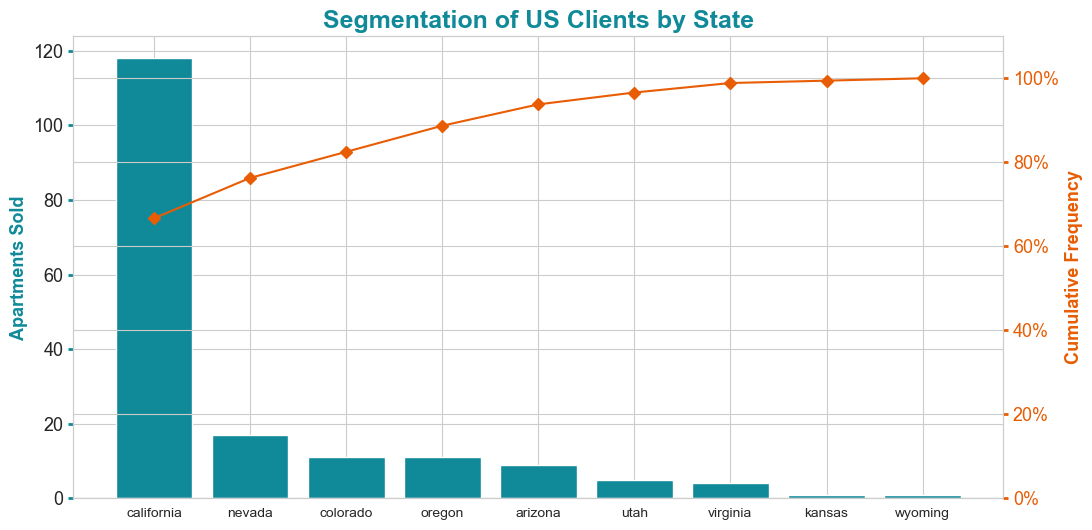

In [111]:
# Setting the seaborn style to "white" for aesthetic reasons - to override the default matplotlib style, removing the grey background and grid for a cleaner look.

sns.set_style("whitegrid") 

# To create the Pareto diagram, we first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of our visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart
# and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative frequency"], 
         color = "#E85D04", 
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 
# Saving the visualization as a pdf file.
plt.savefig("US_segmentation_by_state_pareto_diagram.pdf") 

# Displaying the final visualization.
plt.show()

## Total Revenue per year Line chart

In [112]:
data.head()

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,...,california,home,5.0,0.0,website,madalyn mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,...,california,home,5.0,0.0,website,lara carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,...,california,home,1.0,1.0,client,donavan flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,...,california,investment,3.0,1.0,website,darien dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,...,california,home,4.0,0.0,agency,alessandra perry,25.484932,25.0,"(25.0, 30.0]","(454130.206, 496200.973]"


In [113]:
data.date_sale[0].year

2005

In [114]:
type(data.date_sale[0].year)

int

In [115]:
#Create new column for year of sale
data['year_sale'] = data['date_sale'].apply(lambda x:x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [116]:
#remove nan value to be able to convert float to int
data['year_sale'] = data['year_sale'].fillna(0)
#convert to int
data['year_sale'] = data['year_sale'].astype(int)
#replace zeros with pd.na
data['year_sale'] = data['year_sale'].replace({0:pd.NA})
data['year_sale']

0      2005
1      2005
2      2007
3      2007
4      2004
       ... 
262    <NA>
263    <NA>
264    <NA>
265    <NA>
266    <NA>
Name: year_sale, Length: 267, dtype: object

In [117]:
#calculate revenue for each year
columns_of_interest=['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()
revenue_per_year
#year 2009 is missing

,price$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


In [118]:
revenue_per_year.index.array

<PandasArray>
[2004, 2005, 2006, 2007, 2008, 2010]
Length: 6, dtype: int64

In [119]:
#add 2009 revenue with value 0 since it doesn't exist in our data
revenue_per_year.loc[len(revenue_per_year)]=0
revenue_per_year.index.array[-1]=2009
revenue_per_year

,price$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20
2009,0.00


In [120]:
#sort table by year (index)
revenue_per_year = revenue_per_year.sort_index()
revenue_per_year

,price$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2009,0.00
2010,357538.20


In [121]:
#change column name to revenue$
revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2009,0.00
2010,357538.20


In [122]:
#add new column revenue in millions for easier readability
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$']/1000000
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


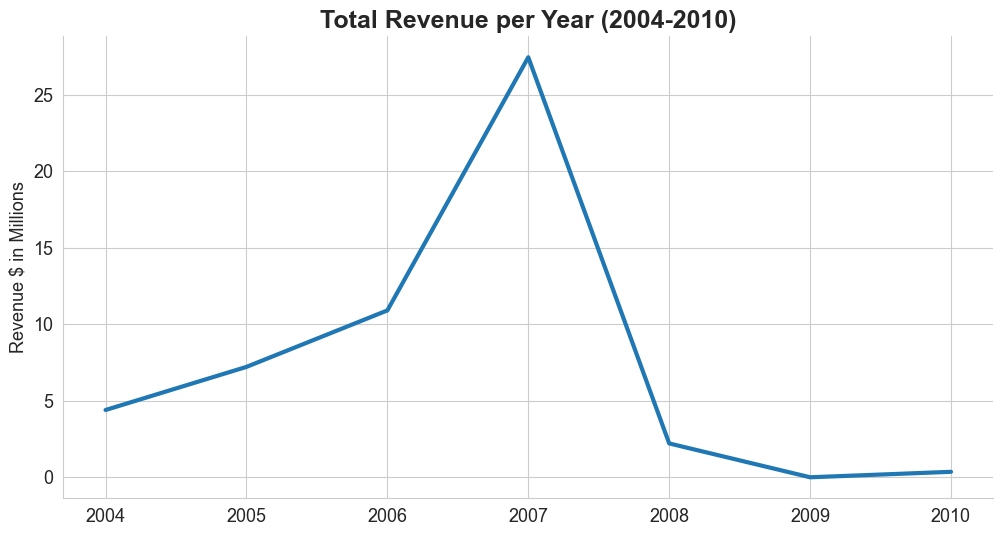

In [123]:
# Let's override the default matplotlib style, opting for a white grid layout.
sns.set_style("whitegrid")

# We'll generate a figure that aligns aesthetically with our other visualizations.
plt.figure(figsize = (12, 6))

# A line chart will be constructed to represent revenue per year.
plt.plot(revenue_per_year['revenue$inM'], 
         linewidth=3)

# Let's ensure our visualization includes essential chart elements like title, labels, and legends.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 13)
plt.xticks(fontsize = 13) # We'll format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting

sns.despine() # We'll remove the top and right borders of the chart for a cleaner look.

# save the visualization as an image file.
plt.savefig("total_revenue_per_year_in_M_line_chart.png")
# save the visualization as a pdf file.
plt.savefig("total_revenue_per_year_in_M_line_chart.pdf")

plt.show() # Finally, display the visualization.

## Total sales yearly across buildings Stacked area chart

In [124]:
data

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,...,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,...,home,5.0,0.0,website,madalyn mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,...,home,5.0,0.0,website,lara carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,...,home,1.0,1.0,client,donavan flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,...,investment,3.0,1.0,website,darien dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,...,home,4.0,0.0,agency,alessandra perry,25.484932,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,NaN,322610.74,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN
263,5047,5,NaT,apartment,47,794.52,NaN,279191.26,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]",NaN
264,5048,5,NaT,apartment,48,1013.27,NaN,287996.53,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN
265,5050,5,NaT,apartment,50,1074.71,NaN,365868.78,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]",NaN


In [125]:
#add new 5 columns for each building for easier calculation of sales for each building separately
data['building1'] = np.where(data['building']=='1' , 1 , 0)
data['building2'] = np.where(data['building']=='2' , 1 , 0)
data['building3'] = np.where(data['building']=='3' , 1 , 0)
data['building4'] = np.where(data['building']=='4' , 1 , 0)
data['building5'] = np.where(data['building']=='5' , 1 , 0)
data

,id,building,date_sale,type,property#,area,customerid,price$,sold,entity,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,C0028,246172.68,1,individual,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,C0027,246331.90,1,individual,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,C0112,209280.91,1,individual,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,C0160,452667.01,1,individual,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,C0014,467083.31,1,individual,...,25.484932,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,NaN,322610.74,0,NaN,...,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN,0,0,0,0,1
263,5047,5,NaT,apartment,47,794.52,NaN,279191.26,0,NaN,...,NaN,NaN,NaN,"(243776.371, 285847.138]",NaN,0,0,0,0,1
264,5048,5,NaT,apartment,48,1013.27,NaN,287996.53,0,NaN,...,NaN,NaN,NaN,"(285847.138, 327917.905]",NaN,0,0,0,0,1
265,5050,5,NaT,apartment,50,1074.71,NaN,365868.78,0,NaN,...,NaN,NaN,NaN,"(327917.905, 369988.672]",NaN,0,0,0,0,1


In [126]:
#new table for sales for each building yearly
columns_of_interest=['year_sale','building1','building2','building3','building4','building5']
building_per_year = data[columns_of_interest].groupby('year_sale').sum()
building_per_year

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


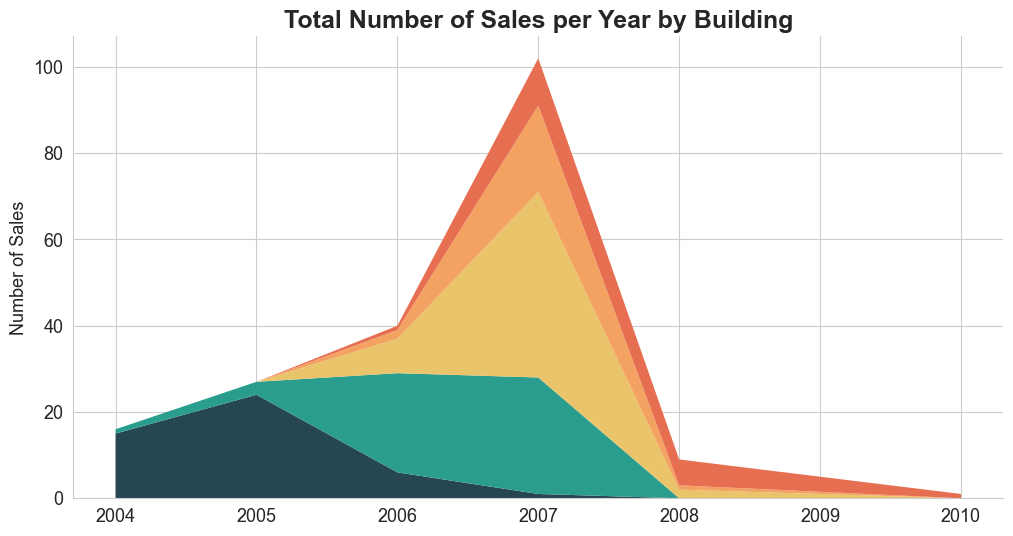

In [127]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.
colors = ["#264653", "#2A9D8F", "E9C46A",'F4A261','E76F51']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]
# override the default matplotlib style, to avoid the grey background, but keep the grid
sns.set_style("whitegrid") 
#determine the size of the chart
plt.figure(figsize = (12, 6)) 
# Create a stacked area plot with our data.
plt.stackplot(building_per_year.index, # The x-axis is simply the index (the year).
              building_per_year['building1'],
              building_per_year['building2'],
              building_per_year['building3'],
              building_per_year['building4'],
              building_per_year['building5'],
              colors = colors,
              edgecolor = 'none')
plt.xticks( fontsize = 13) # format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel('Number of Sales',fontsize=13)# add label for y-axis
plt.title('Total Number of Sales per Year by Building',fontsize=18,fontweight='bold')# add title for chart
sns.despine() # removes the top and right border of our graph
# export your chart as a pdf file
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.pdf")
# export your chart as a picture
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png") 
plt.show()
#Error in visualizing data of 2009

In [128]:
#add 2009 year with zero sales to plot correct chart
building_per_year.loc[len(building_per_year)] = 0
building_per_year

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1
6,0,0,0,0,0


In [129]:
building_per_year.index.array[-1] = 2009
building_per_year

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1
2009,0,0,0,0,0


In [130]:
building_per_year=building_per_year.sort_index()
building_per_year

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2009,0,0,0,0,0
2010,0,0,0,0,1


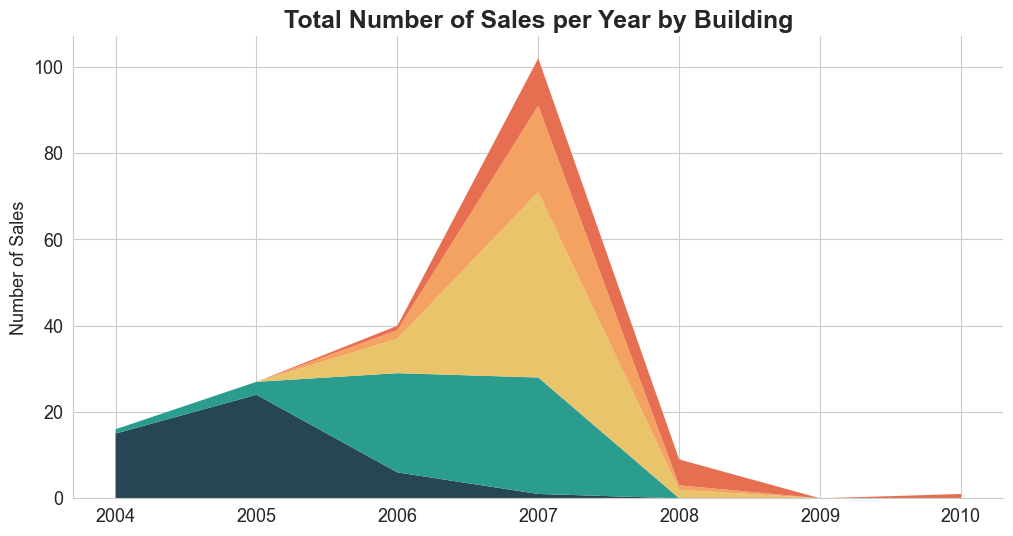

In [131]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.
colors = ["#264653", "#2A9D8F", "E9C46A",'F4A261','E76F51']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]
# override the default matplotlib style, to avoid the grey background, but keep the grid
sns.set_style("whitegrid") 
#determine the size of the chart
plt.figure(figsize = (12, 6)) 
# Create a stacked area plot with our data.
plt.stackplot(building_per_year.index, # The x-axis is simply the index (the year).
              building_per_year['building1'],
              building_per_year['building2'],
              building_per_year['building3'],
              building_per_year['building4'],
              building_per_year['building5'],
              colors = colors,
              edgecolor = 'none')
plt.xticks( fontsize = 13) # format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel('Number of Sales',fontsize=13)# add label for y-axis
plt.title('Total Number of Sales per Year by Building',fontsize=18,fontweight='bold')# add title for chart
sns.despine() # removes the top and right border of our graph
# export your chart as a pdf file
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.pdf")
# export your chart as a picture
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png") 
plt.show()